In [8]:
import pandas as pd
data = pd.read_csv("Dataset/Single Linkage.csv")
data

,objects,x,y
0,0,1,4
1,1,2,8
2,2,5,10
3,3,12,18
4,4,14,28


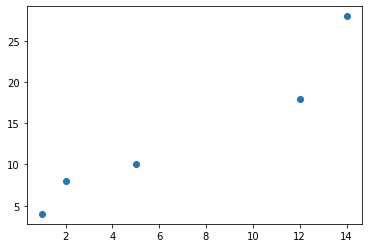

In [15]:
plt.scatter(data['x'],data['y'])

In [14]:
from scipy.spatial.distance import squareform, pdist
dist = pd.DataFrame(squareform(pdist(data[['x', 'y']]), 'euclidean'), columns=data.index.values, index=data.index.values)
dist

,0,1,2,3,4
0,0.000000,4.123106,7.211103,17.804494,27.294688
1,4.123106,0.000000,3.605551,14.142136,23.323808
2,7.211103,3.605551,0.000000,10.630146,20.124612
3,17.804494,14.142136,10.630146,0.000000,10.198039
4,27.294688,23.323808,20.124612,10.198039,0.000000


In [17]:
def single_distance(clusters ,cluster_num):
    print('first cluster | ','second cluster | ', 'distance')
    while len(clusters) is not cluster_num:
        # Clustering           (
        closest_distance=clust_1=clust_2 = math.inf
        # for every cluster (until second last element)
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            # for each point in each cluster
            for point_id,point in enumerate(cluster): 
                # we only need to compare with clusters after the current one
                for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]): 
                    # go through every point in this prospective cluster as well
                    for point2_id, point2 in enumerate(cluster2):
# if this distance is better than our previous best distance then we are going to overwrite it
                        if distance.euclidean(point,point2) < closest_distance: 
                            # Only used for comparing 
                            closest_distance = distance.euclidean(point,point2)
                # this will be used at the end to figure out which cluster to merge with which
                            clust_1 = cluster_id
                # this cluster will be destroyed by the end
                            clust_2 = cluster2_id+cluster_id+1
               # extend just appends the contents to the list without flattening it out
        print(clust_1,' | ',clust_2, ' | ',closest_distance)
        clusters[clust_1].extend(clusters[clust_2]) 
        # don't need this index anymore, and we have just clustered once more
        clusters.pop(clust_2) 
    return(clusters)

In [22]:
### Hierarchical clustering
def hierarchical(data, cluster_num, metric = 'single'):
    # initialization of clusters at first (every point is a cluster)
    init_clusters=[]
    for index, row in data.iterrows():
        init_clusters.append([[row['x'], row['y']]])
    if metric is 'single':
        return single_distance(init_clusters, cluster_num)

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\admin\AppData\Local\Temp\ipykernel_4676\3642554651.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if metric is 'single':


first cluster |  second cluster |  distance
1  |  2  |  3.605551275463989


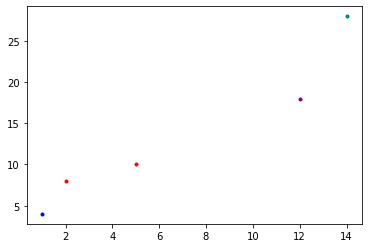

In [25]:
import math
from scipy.spatial import distance
clusters = hierarchical(data,4)
colors = ['blue', 'red', 'purple', 'teal']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])